<a href="https://colab.research.google.com/github/sahiliem/colab/blob/main/CoQA_BERT_QuestionAnswering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question Answering with a fine-tuned BERT on CoQA dataset

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install transformers

import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.8 MB/s eta 0:00:00


### Data loading

In [2]:
coqa = pd.read_json('http://downloads.cs.stanford.edu/nlp/data/coqa/coqa-train-v1.0.json')
coqa.head()

,version,data
0,1,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,1,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,1,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,1,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


### Data cleaning

In [3]:
del coqa["version"]

In [4]:
cols = ["text","question","answer"]

# j = 1
comp_list = []
for index, row in coqa.iterrows():
    for i in range(len(row["data"]["questions"])):
        temp_list = []
#         temp_list.append(j)
        temp_list.append(row["data"]["story"])
        temp_list.append(row["data"]["questions"][i]["input_text"])
        temp_list.append(row["data"]["answers"][i]["input_text"])
        comp_list.append(temp_list)
#     j += 1
new_df = pd.DataFrame(comp_list, columns=cols) 

### Saving the data as csv

In [5]:
new_df.to_csv("CoQA_data.csv", index=False)

### Loading the data

In [6]:
data = pd.read_csv("CoQA_data.csv")
data.head()

,text,question,answer
0,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475
1,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research
2,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law"
3,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology"
4,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project


In [7]:
print("Number of question and answers: ", len(data))

Number of question and answers:  108647


### Building the chatbot

In [8]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [9]:
random_num = np.random.randint(0,len(data))

question = data["question"][random_num]
text = data["text"][random_num]

In [10]:
print(question, "\n", text)

What is his main message? 
 Syria may be embroiled in a brutal three-year civil war, but that's not stopping the government from holding controversial presidential elections this week. 

The election, which has been branded a sham by the West and by the Syrian opposition, is widely expected to return President Bashar al-Assad to power. 

CNN International Correspondent Frederik Pleitgen has reported from inside Syria numerous times during the conflict, which has left an estimated 150,000 people dead. He breaks down the key questions ahead of Tuesday's election. 

Why is it happening now? 

The government says Syria's new constitution stipulates that presidential elections must be held now. The regime says it shows the country is moving forward and that it is the first time a president will be elected by the people rather than appointed. The opposition says the election is a fraud, that voting will be rigged and that the poll serves only to cement Assad's power. 

Who are the other cand

In [11]:
input_ids = tokenizer.encode(question, text)
print("The input has a total of {} tokens.".format(len(input_ids)))

The input has a total of 426 tokens.


In [12]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)

for token, id in zip(tokens, input_ids):
    print('{:8}{:8,}'.format(token,id))

[CLS]        101
what       2,054
is         2,003
his        2,010
main       2,364
message    4,471
?          1,029
[SEP]        102
syria      7,795
may        2,089
be         2,022
em         7,861
##bro     12,618
##iled    18,450
in         1,999
a          1,037
brutal    12,077
three      2,093
-          1,011
year       2,095
civil      2,942
war        2,162
,          1,010
but        2,021
that       2,008
'          1,005
s          1,055
not        2,025
stopping   7,458
the        1,996
government   2,231
from       2,013
holding    3,173
controversial   6,801
presidential   4,883
elections   3,864
this       2,023
week       2,733
.          1,012
the        1,996
election   2,602
,          1,010
which      2,029
has        2,038
been       2,042
branded   11,180
a          1,037
sham      25,850
by         2,011
the        1,996
west       2,225
and        1,998
by         2,011
the        1,996
syrian     9,042
opposition   4,559
,          1,010
is         2,003


In [13]:
#first occurence of [SEP] token
sep_idx = input_ids.index(tokenizer.sep_token_id)
print(sep_idx)

#number of tokens in segment A - question
num_seg_a = sep_idx+1
print(num_seg_a)

#number of tokens in segment B - text
num_seg_b = len(input_ids) - num_seg_a
print(num_seg_b)

segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids)

assert len(segment_ids) == len(input_ids)

7
8
418
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [14]:
#token input_ids to represent the input
#token segment_ids to differentiate our segments - text and question 
output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
#print(output.start_logits, output.end_logits)

In [17]:
#tokens with highest start and end scores
answer_start = torch.argmax(output.start_logits)
answer_end = torch.argmax(output.end_logits)
#print(answer_start, answer_end)

In [18]:
if answer_end >= answer_start:
    answer = " ".join(tokens[answer_start:answer_end+1])
else:
    print("I am unable to find the answer to this question. Can you please ask another question?")
    
print("Text:\n{}".format(text.capitalize()))
print("\nQuestion:\n{}".format(question.capitalize()))
print("\nAnswer:\n{}.".format(answer.capitalize()))

Text:
Syria may be embroiled in a brutal three-year civil war, but that's not stopping the government from holding controversial presidential elections this week. 

the election, which has been branded a sham by the west and by the syrian opposition, is widely expected to return president bashar al-assad to power. 

cnn international correspondent frederik pleitgen has reported from inside syria numerous times during the conflict, which has left an estimated 150,000 people dead. he breaks down the key questions ahead of tuesday's election. 

why is it happening now? 

the government says syria's new constitution stipulates that presidential elections must be held now. the regime says it shows the country is moving forward and that it is the first time a president will be elected by the people rather than appointed. the opposition says the election is a fraud, that voting will be rigged and that the poll serves only to cement assad's power. 

who are the other candidates? 

the other tw

### Visualization of the tokens

In [19]:
start_scores = output.start_logits.detach().numpy().flatten()
end_scores = output.end_logits.detach().numpy().flatten()

token_labels = []
for i, token in enumerate(tokens):
    token_labels.append("{}-{}".format(token,i))

In [ ]:
print(len(token_labels))

306


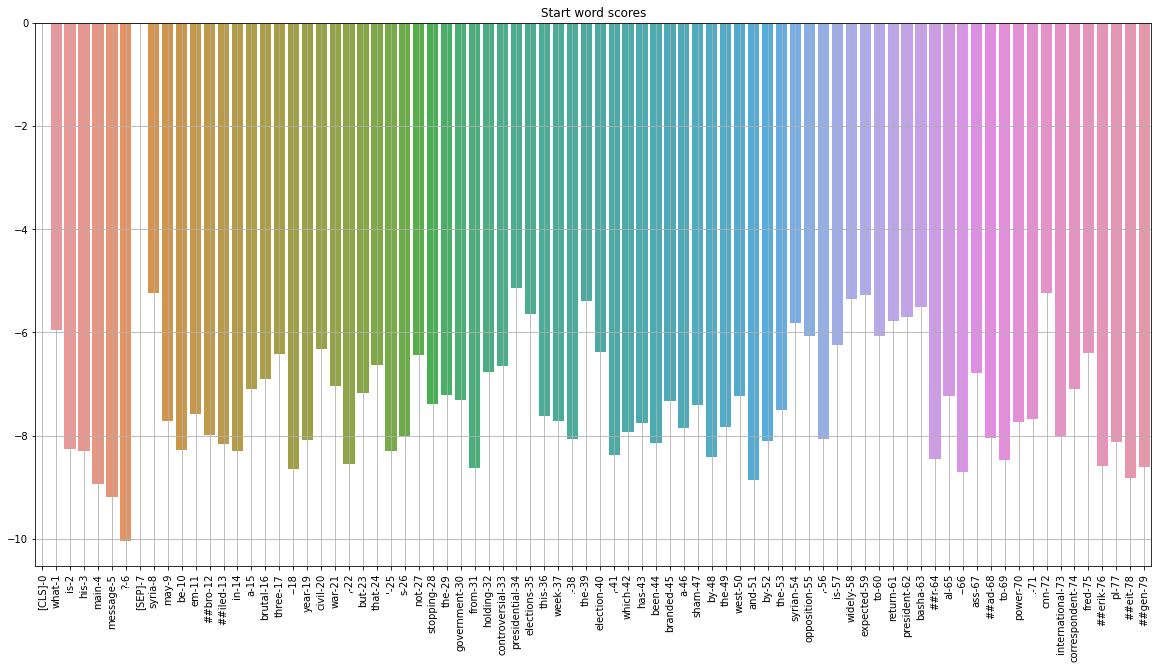

In [20]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()

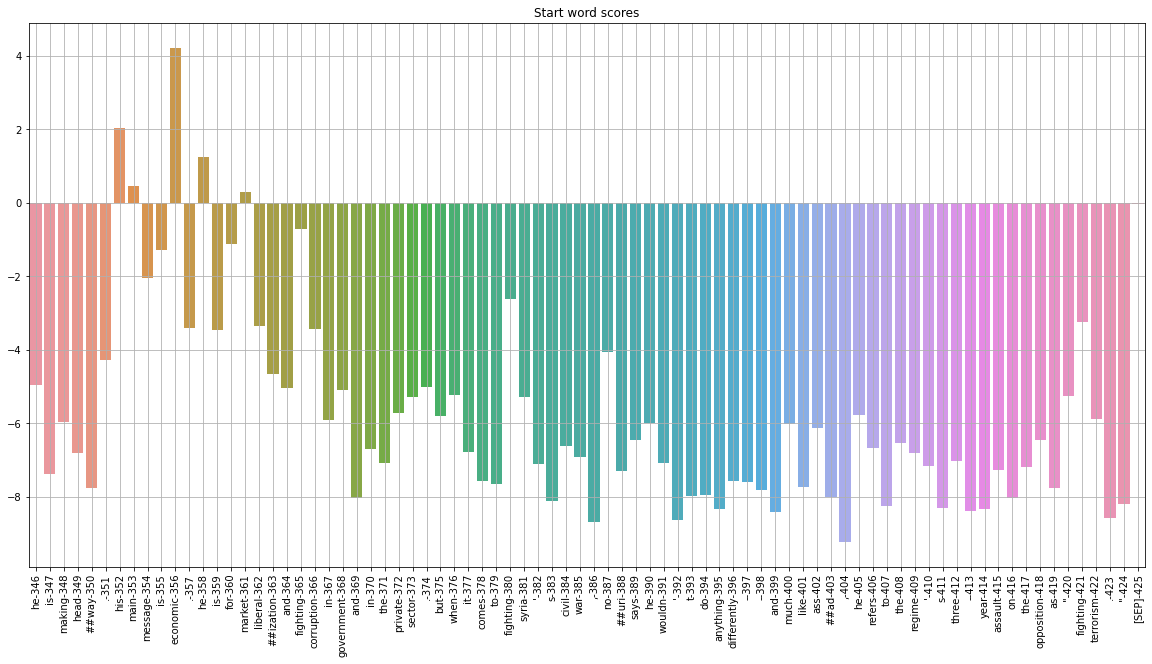

In [21]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()

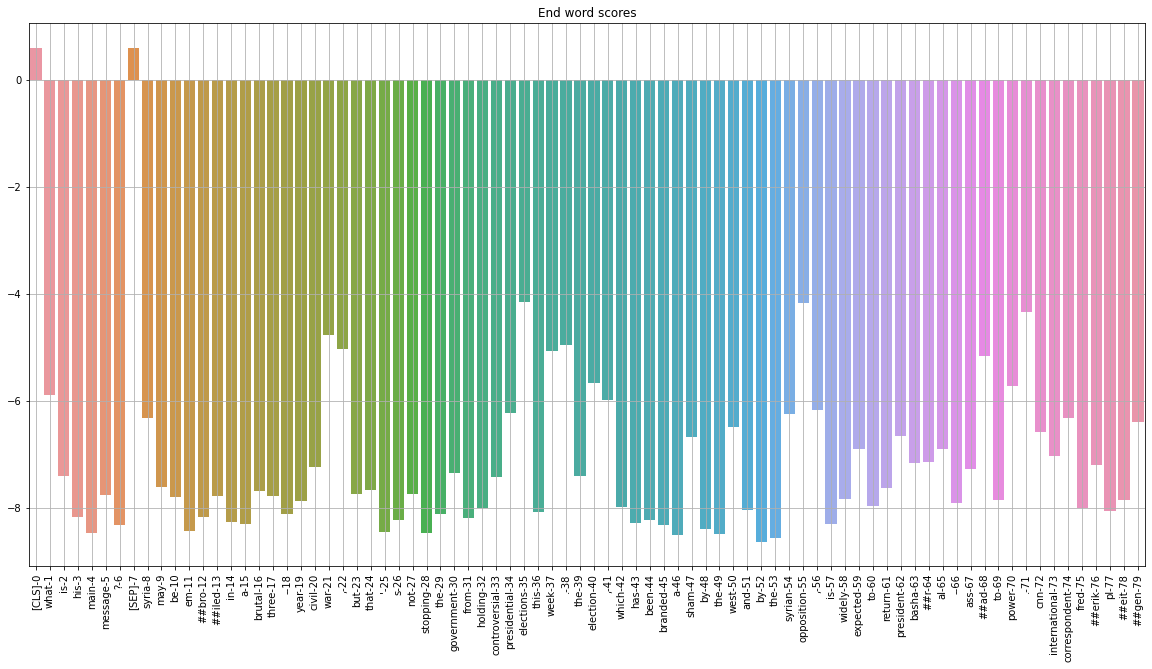

In [22]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=end_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()

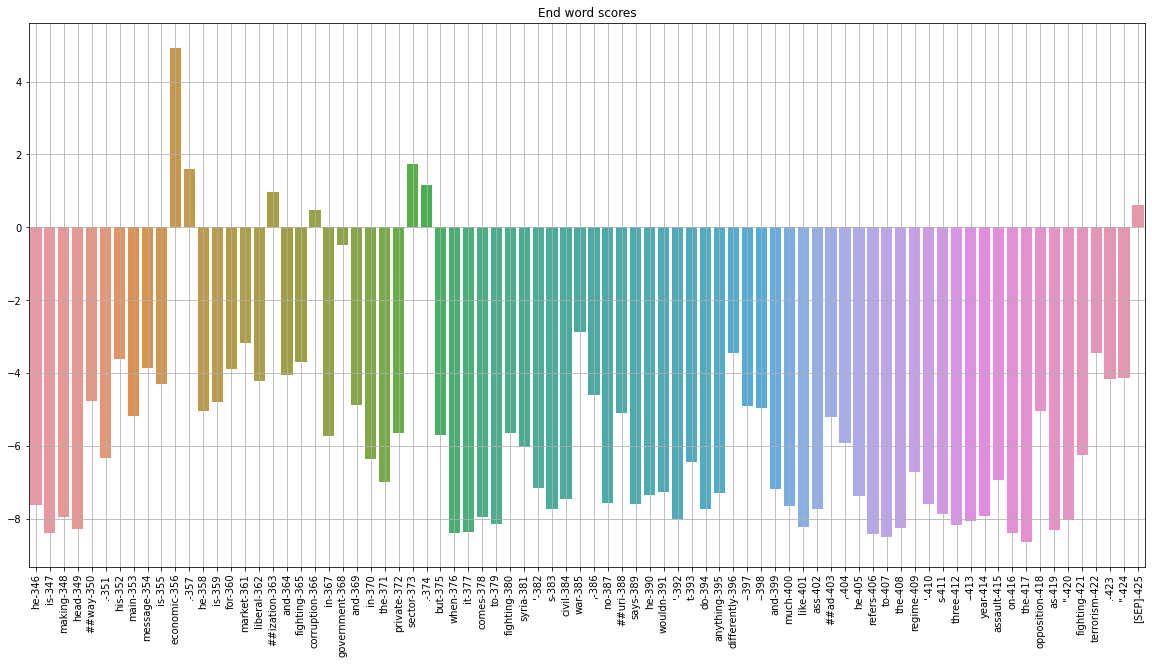

In [23]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()

### Code to join the broken words

In [24]:
answer = tokens[answer_start]

for i in range(answer_start+1, answer_end+1):
    if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
    else:
        answer += " " + tokens[i]

### Function

In [25]:
def question_answer(question, text):
    
    #tokenize question and text in ids as a pair
    input_ids = tokenizer.encode(question, text)
    
    #string version of tokenized ids
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    #segment IDs
    #first occurence of [SEP] token
    sep_idx = input_ids.index(tokenizer.sep_token_id)

    #number of tokens in segment A - question
    num_seg_a = sep_idx+1

    #number of tokens in segment B - text
    num_seg_b = len(input_ids) - num_seg_a
    
    #list of 0s and 1s
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    assert len(segment_ids) == len(input_ids)
    
    #model output using input_ids and segment_ids
    output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    
    #reconstructing the answer
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)

    if answer_end >= answer_start:
        answer = tokens[answer_start]
        for i in range(answer_start+1, answer_end+1):
            if tokens[i][0:2] == "##":
                answer += tokens[i][2:]
            else:
                answer += " " + tokens[i]
                
    if answer.startswith("[CLS]"):
        answer = "Unable to find the answer to your question."
    
#     print("Text:\n{}".format(text.capitalize()))
#     print("\nQuestion:\n{}".format(question.capitalize()))
    print("\nAnswer:\n{}".format(answer.capitalize()))

In [29]:
text = """New York (CNN) -- More than 80 Michael Jackson collectibles -- including the late pop star's famous rhinestone-studded glove from a 1983 performance -- were auctioned off Saturday, reaping a total $2 million. Profits from the auction at the Hard Rock Cafe in New York's Times Square crushed pre-sale expectations of only $120,000 in sales. The highly prized memorabilia, which included items spanning the many stages of Jackson's career, came from more than 30 fans, associates and family members, who contacted Julien's Auctions to sell their gifts and mementos of the singer. Jackson's flashy glove was the big-ticket item of the night, fetching $420,000 from a buyer in Hong Kong, China. Jackson wore the glove at a 1983 performance during \"Motown 25,\" an NBC special where he debuted his revolutionary moonwalk. Fellow Motown star Walter \"Clyde\" Orange of the Commodores, who also performed in the special 26 years ago, said he asked for Jackson's autograph at the time, but Jackson gave him the glove instead. "The legacy that [Jackson] left behind is bigger than life for me,\" Orange said. \"I hope that through that glove people can see what he was trying to say in his music and what he said in his music.\" Orange said he plans to give a portion of the proceeds to charity. Hoffman Ma, who bought the glove on behalf of Ponte 16 Resort in Macau, paid a 25 percent buyer's premium, which was tacked onto all final sales over $50,000. Winners of items less than $50,000 paid a 20 percent premium."""
question = "Where was the Auction held?"

question_answer(question, text)


Answer:
Hard rock cafe in new york ' s times square


In [34]:
text2 = """Contractor will submit invoices to Portland ltd in accordance with the invoicing schedule and invoicing delivery terms set forth in the Statement of Services (Schedule I). Final invoices must be submitted within 60 days of the end date of the Contract. Contractor recognizes that in many cases Portland ltd’ donor will not reimburse Portland ltd for invoices submitted beyond 60 days after the termination of a contract and therefore Portland ltd will have no obligation to pay any portion of invoices received more than 60 days after the end date of the Contract. Each invoice will include (i)the Contract Number; (ii)Contractor’s name and address; (iii)a description of the Services performed, (iv)the dates such Services were performed, (v)a pricing calculation based on the payment terms, (vi)properly reimbursable expenses (if any) incurred along with receipts for such expenses (if applicable) for all individual expenses exceeding $25 USD, and (vii) such other information as Portland ltd may reasonably request.  Invoices will only be deemed received on the date they are delivered to the Authorized Representative pursuant to the Payment Terms (see Schedule I).  If Portland ltd determines that Services that are the subject of an invoice have not been performed in accordance with the Statement of Services, Portland ltd may dispute the invoice by sending Contractor notice of such dispute after Portland ltd’ receipt of the invoice. Such notice shall clearly state the specific Services disputed, and Portland ltd’ reason for disputing the performance of the Services. If both parties accept the dispute of the invoice, they shall agree in writing as to the steps required of Contractor to ensure that the performance of the disputed Services is subsequently completed in accordance with the Additional Terms, and the time required of Contractor to complete the Services."""
#question2 = "All information that will be available in an invoice"
question2= "Any no obligation to pay in contract"

question_answer(question2, text2)


Answer:
Portland ltd will have no obligation to pay any portion of invoices received more than 60 days after the end date of the contract


In [27]:
print("Original answer:\n", data.loc[data["question"] == question]["answer"].values[0])

Original answer:
 Hard Rock Cafe


### Playing with the chatbot

In [ ]:
text = input("Please enter your text: \n")
question = input("\nPlease enter your question: \n")

while True:
    question_answer(question, text)
    
    flag = True
    flag_N = False
    
    while flag:
        response = input("\nDo you want to ask another question based on this text (Y/N)? ")
        if response[0] == "Y":
            question = input("\nPlease enter your question: \n")
            flag = False
        elif response[0] == "N":
            print("\nBye!")
            flag = False
            flag_N = True
            
    if flag_N == True:
        break

Please enter your text: 
The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula.   The Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail.   In March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts, to be made available online.   The Vatican Secret Archives were separated from the library at 

### Version checking

In [ ]:
torch.__version__

'1.7.1'